<a href="https://colab.research.google.com/github/RenatevanKempen/Python-in-Power-BI/blob/main/Predicting_with_Power_BI_Loan_Egibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

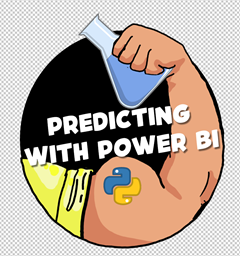

## Predicting Loan Egibility

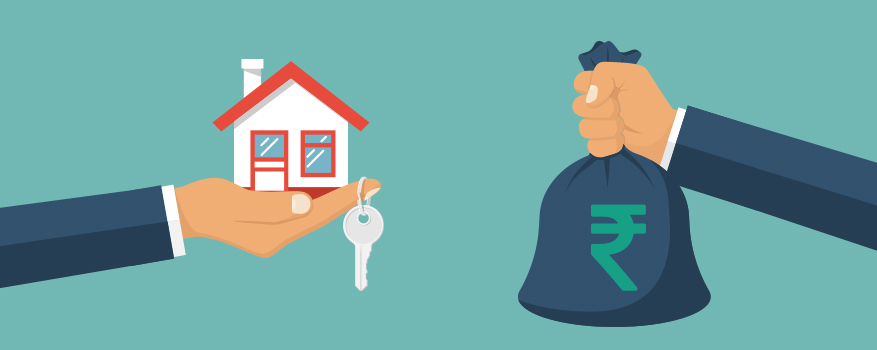

## The problem - Classification

In this notebook we look at the data we got via this [Kaggle dataset](https://www.kaggle.com/gavincanacam/home-loan-predictions).

This company called "Housing Finance company" wants to automate the loan eligibility process based on the customer information and identify the factors/customer segments who are eligible for taking the loan.

We will explore the dataset given, check the various features we have and we will make an algorithm that can predict whether or not the loan would be approved in order to automate the process

# 1. Import the important libraries / packages
These packages are needed to load and use the dataset

In [ ]:
import pandas as pd #we use this to load, read and transform the dataset
import numpy as np #we use this for statistical analysis
import matplotlib.pyplot as plt #we use this to visualize the dataset
import seaborn as sns #we use this to make countplots
import sklearn.metrics as sklm #This is to test the models

1b. Mount your drive to access the data properly from your drive

In [ ]:
# You will need to mount your drive using the following commands:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#here we load the train data
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/GetResponsive Trainingen/Loan Egibility/Train_Loan_Home.csv')

#and immediately I would like to see how this dataset looks like
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#now let's look closer at the dataset we got
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


It seems that we have a lot of text / category information (these are of the Dtype 'object') and a few numerical columns (Dtypes 'int64' and 'float64').

The last column 'Loan_status' is the column we would like to predict.

In [ ]:
data.shape

(614, 13)

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


It seems that we have some strange outliers for the income and loan amounts. We will look and handle these later on.

In [ ]:
#let's take a closer look to the object data
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001520,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
#Let's see what the options are in the text columns (the objects)
print('Gender: ' + str(data['Gender'].unique()))
print('Married: ' + str(data['Married'].unique()))
print('Dependents: '+ str(data['Dependents'].unique()))
print('Education: '+ str(data['Education'].unique()))
print('Self_Employed: '+ str(data['Self_Employed'].unique()))
print('Property_Area: '+ str(data['Property_Area'].unique()))

Gender: ['Male' 'Female' nan]
Married: ['No' 'Yes' nan]
Dependents: ['0' '1' '2' '3+' nan]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Property_Area: ['Urban' 'Rural' 'Semiurban']


Seems there are more categorical (binary) columns, such as Gender, Married and education

# Loan Status in this Dataset

![approved or rejected](https://db3pap006files.storage.live.com/y4pVnKKIPUMfGtdOP-mIsJIDFD6QD9mNmC5br03t9oSX6uCFHlSgyrzOKvkBvemfQbgGRltJXJI1DygwGgxBzszvmqoQtfMhbsE_Ajl8VAnNDIy3BIOXRlTJAB3jdnZYTPtQFmMkHmo74vxcBUc_JjX1kW47Rp33UKov0MllAFFuPU-lzJypcr-s05Yv1bCIpcC9bwZsareXmkMCxxmCZBS67Ya2zrP2Ac3z3F0enmC6qo/stamp-2114884_1920.png?psid=1&width=192&height=65)

As Loan Status is the column we want to predict, let's explore this column in the training dataset. 

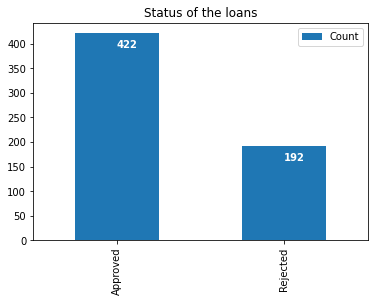

In [ ]:
#first let's count the number of loans approved and rejected
Approved = data[data['Loan_Status'] == 'Y']['Loan_Status'].count()
Rejected = data[data['Loan_Status'] == 'N']['Loan_Status'].count()

#now let's put these results in a dataframe to visualize them
df = {"Count" : [Approved, Rejected]} #this is for the legend to be clear that it is counts
Status = pd.DataFrame(df, index=["Approved", "Rejected"])

#let's visualize the bar plot
ax = Status.plot(kind = 'bar', title = 'Status of the loans')

#here I want to add the labels to the bars and to make this more clear I've made them white of color
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() - 30), color = 'white', fontweight = 'bold')

In [ ]:
#let's see the percentages of the status:
print('The percentage of approved loans : %.2f' % (data['Loan_Status'].value_counts()[0] / len(data)))
print('The percentage of rejected loans : %.2f' % (data['Loan_Status'].value_counts()[1] / len(data)))

The percentage of approved loans : 0.69
The percentage of rejected loans : 0.31


It looks like this is not well balanced in this set.
But as this is the only data we have, I will leave this as is for now. 

# Handling missing values
Let's continue with handling the missing values in this dataset. 
Let's see where and how many missing values there are in this dataset.

In [ ]:
#let's look in what columns there are missing values 
data.isnull().sum().sort_values(ascending = False) 

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

I will look closely at the top 3 here (as these have the most missing values) and I will drop the other missing value rows.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


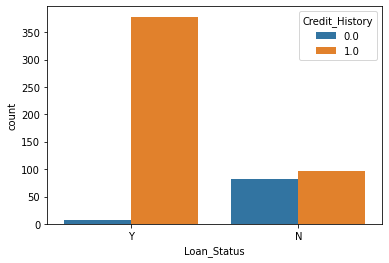

In [ ]:
#Let's look at the credit history in more detail to see what the best way is to handle these missing values
#I will use seaborn for the visualization
sns.countplot(data['Loan_Status'],hue=data['Credit_History'])

Looks like a good feature to use, as there appears to be a correlation between if you have had credit or not versus if you get the loan. For now it seems that if you did not have a credit before you are likely not to get a new one, so let's look deeper!

In [ ]:
print(pd.crosstab(data['Credit_History'],data['Loan_Status']))

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


In [ ]:
print('The percentage of credit history yes : %.2f' % (data['Credit_History'].value_counts()[1] / len(data)))
print('The percentage of credit history no : %.2f' % (data['Credit_History'].value_counts()[0] / len(data)))

The percentage of credit history yes : 0.77
The percentage of credit history no : 0.14


Options in handling these missing values:
- Drop all the rows with missing values
- Handle the missing values with 0 (so no history) as there is nothing clear. 
- Or we use the most frequent number, which is 1 for the credit history. 

In this case, I tend to go for the 0, as there is no history clear.

In [ ]:
data['Credit_History'] = data['Credit_History'].fillna(0)
data.isnull().sum().sort_values(ascending = False)

Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
Credit_History        0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


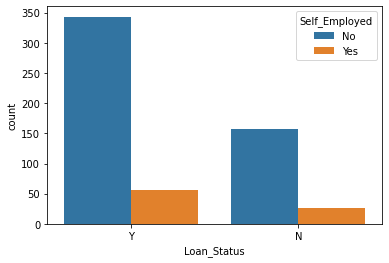

In [ ]:
#Continue with Self_Employed
sns.countplot(data['Loan_Status'],hue=data['Self_Employed'])

As this seems to have no effect on the outcome, I will fill these with the most frequent one (so No)

In [ ]:
data['Self_Employed'] = data['Self_Employed'].fillna('No')
data.isnull().sum().sort_values(ascending = False)

LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
Credit_History        0
CoapplicantIncome     0
ApplicantIncome       0
Self_Employed         0
Education             0
Loan_ID               0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


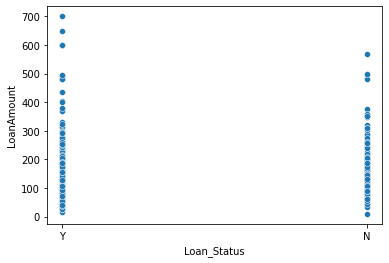

In [ ]:
#Continue with LoanAmount, as this is a numeric, thus continous number, I will use a scatterplot to see if there is a pattern / correlation. 
sns.scatterplot(data['Loan_Status'], data['LoanAmount'])

In [ ]:
#As the patterns look similar for yes and no, I will fill the missing values with the mean of the column
data['LoanAmount'] = data['LoanAmount'].fillna( data['LoanAmount'].mean())
data.isnull().sum().sort_values(ascending = False)

Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
Credit_History        0
LoanAmount            0
CoapplicantIncome     0
ApplicantIncome       0
Self_Employed         0
Education             0
Loan_ID               0
dtype: int64

In [ ]:
#Let's drop the rest of the missing values:
data.dropna(inplace = True)
data.shape

(573, 13)

# Take a closer look at some of the features
let's look at the outliers!

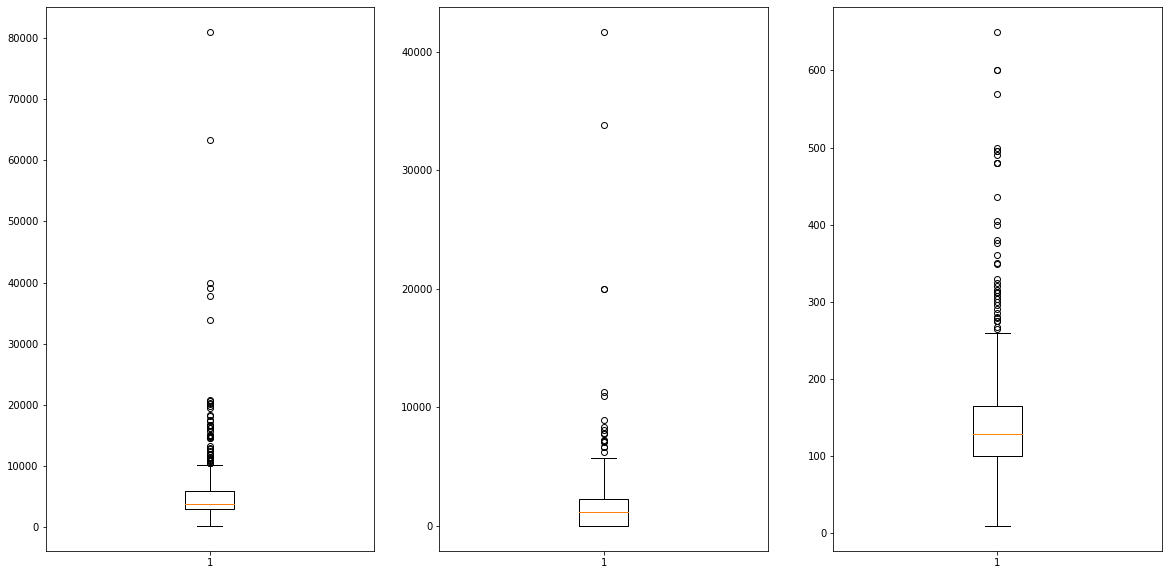

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
ax1.boxplot(data['ApplicantIncome'])
ax2.boxplot(data['CoapplicantIncome'])
ax3.boxplot(data['LoanAmount'])
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7f0bb5ac2940>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0bb5ad1390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0bb5ad1e10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0bb5ad1a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0bb5ac2c50>,
  <matplotlib.lines.Line2D at 0x7f0bb5ac2fd0>]}

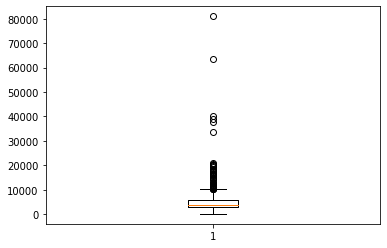

In [ ]:
#Look closely at the ApplicantIncome column.
plt.boxplot(data['ApplicantIncome'])

In [ ]:
#We see that there are two great outliers here. 
#let's look closer to these two outliers
outliers = data[data['ApplicantIncome'] > 50000]
outliers.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


{'boxes': [<matplotlib.lines.Line2D at 0x7f0bb5a2add8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0bb5a3a828>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0bb5a432e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0bb5a3af28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0bb5a3a128>,
  <matplotlib.lines.Line2D at 0x7f0bb5a3a4a8>]}

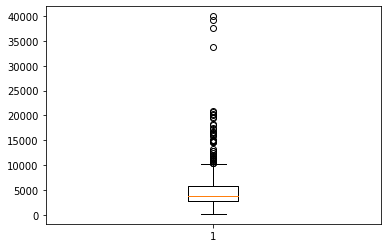

In [ ]:
#As you can see that these are just two rows and the status is not for both approved, I will remove these two rows for the model. 
data = data[data['ApplicantIncome'] < 50000]
#let's plot the applicant income again in a boxplot
plt.boxplot(data['ApplicantIncome'])

In [ ]:
#still a lot of outliers above the 25000. Let's look closer to those again to be sure we need to add them to get a good model performance
outliers = data[data['ApplicantIncome'] > 25000]
outliers.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


These seem to be ok for the model as 75% is approved. So let's keep them for now.

{'boxes': [<matplotlib.lines.Line2D at 0x7f0bb5999dd8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0bb59a9828>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0bb59b12e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0bb59a9f28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0bb59a9128>,
  <matplotlib.lines.Line2D at 0x7f0bb59a94a8>]}

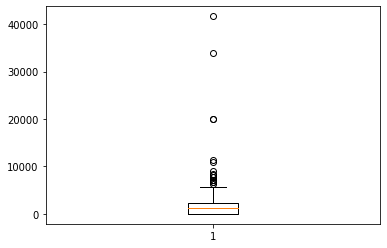

In [ ]:
#Look closely at the CoApplicantIncome column.
plt.boxplot(data['CoapplicantIncome'])

In [ ]:
#We see that there are again two great outliers here. 
#let's look closer to these two outliers
outliers = data[data['CoapplicantIncome'] > 25000]
outliers.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
581,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
600,LP002949,Female,No,3+,Graduate,No,416,41667.0,350.0,180.0,0.0,Urban,N


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


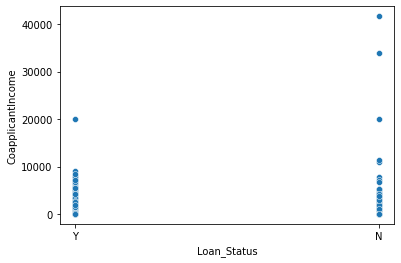

In [ ]:
sns.scatterplot(data['Loan_Status'], data['CoapplicantIncome'])

As you can see here, there are some outliers for Yes and No, but the two highest co applicant incomes have a no, this might be due to the low income of the applicant. Let's see if there is a correlation there? 

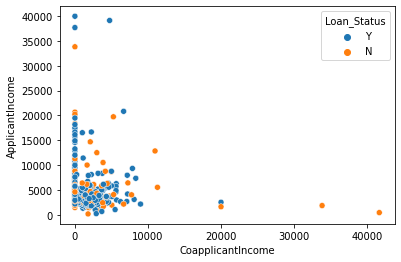

In [ ]:
sns.scatterplot(data=data, x="CoapplicantIncome", y="ApplicantIncome", hue="Loan_Status")

There is no real correlation here, so for now let's remove these outliers. 

{'boxes': [<matplotlib.lines.Line2D at 0x7f0bb58cb7b8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0bb5859208>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0bb5859c88>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0bb5859908>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0bb58cbac8>,
  <matplotlib.lines.Line2D at 0x7f0bb58cbe48>]}

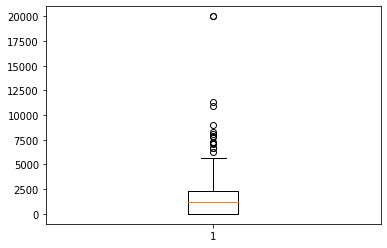

In [ ]:
data = data[data['CoapplicantIncome'] < 25000]
#let's plot the applicant income again in a boxplot
plt.boxplot(data['CoapplicantIncome'])

# Make all columns numeric
We need to make all column input numeric to use them further on. 
This is what I will do now. 

In [ ]:
#First make the target column (Loan_Status) numerical
data['Loan_Status'] = np.where((data['Loan_Status'] == 'Y'), 1, 0)

In [ ]:
#Next we will drop the loan_ID column as this will only confuse the model later on
data.drop('Loan_ID', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             569 non-null    object 
 1   Married            569 non-null    object 
 2   Dependents         569 non-null    object 
 3   Education          569 non-null    object 
 4   Self_Employed      569 non-null    object 
 5   ApplicantIncome    569 non-null    int64  
 6   CoapplicantIncome  569 non-null    float64
 7   LoanAmount         569 non-null    float64
 8   Loan_Amount_Term   569 non-null    float64
 9   Credit_History     569 non-null    float64
 10  Property_Area      569 non-null    object 
 11  Loan_Status        569 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 57.8+ KB


In [ ]:
#Next, make all other columns numerical as well. 
data['Married'] = np.where((data['Married'] == 'Yes'), 1, 0)
data['Gender'] = np.where((data['Gender'] == 'Female'), 1, 0)
data['Education'] = np.where((data['Education'] == 'Graduate'), 1, 0)
data['Self_Employed'] = np.where((data['Self_Employed'] == 'Yes'), 1, 0)
data['Dependents'] = np.where((data['Dependents'] == '0'), 0, 1) #I saw that there was no big difference between the number of dependents if there are any. So I made no dependents = 0  and yes dependents = 1

In [ ]:
#Lastly I want to change the Property_Area column, but I want to keep all three options. Therefore this I will do differently. 

def f(row):
  if row['Property_Area'] == "Rural":
    val = 1
  elif row['Property_Area'] == "Urban":
    val = 0
  else:
    val = 2
  return val

data['Property_Area'] = data.apply(f, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             569 non-null    int64  
 1   Married            569 non-null    int64  
 2   Dependents         569 non-null    int64  
 3   Education          569 non-null    int64  
 4   Self_Employed      569 non-null    int64  
 5   ApplicantIncome    569 non-null    int64  
 6   CoapplicantIncome  569 non-null    float64
 7   LoanAmount         569 non-null    float64
 8   Loan_Amount_Term   569 non-null    float64
 9   Credit_History     569 non-null    float64
 10  Property_Area      569 non-null    int64  
 11  Loan_Status        569 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.8 KB


Right so now all columns are numeric

# Most important features
Let's continue by looking at the most important features according to three different tests. 
Than we will use the top ones to train and test our first model. 

In [ ]:
#First we need to split the dataset in the y-column (the target) and the components (X), the independent columns. 
#This is needed as we need to use the X columns to predict the y in the model. 

X = data.iloc[:,0:11]  #independent columns 
y = data.iloc[:,-1]    #target column = Status of the loan

[0.03225608 0.02582261 0.03937142 0.02633448 0.02490134 0.22085053
 0.13453612 0.21347968 0.06092079 0.15530265 0.06622431]


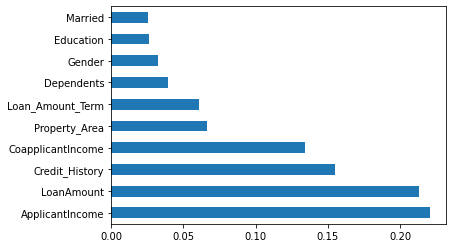

In [ ]:
#TEST 1 - ExtraTreesClassifier - GOOD IF YOU USE DECISION TREE MODELS
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#TEST 2 - SelectKBest - GOOD IF YOU USE A K-NEAREST NEIGHBOR MODEL
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Name of the column','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Name of the column       Score
5     ApplicantIncome  544.916149
7          LoanAmount   79.485320
6   CoapplicantIncome   24.781372
9      Credit_History   18.819188
10      Property_Area    3.850646
1             Married    1.798039
3           Education    0.649937
8    Loan_Amount_Term    0.632545
4       Self_Employed    0.342808
0              Gender    0.230661


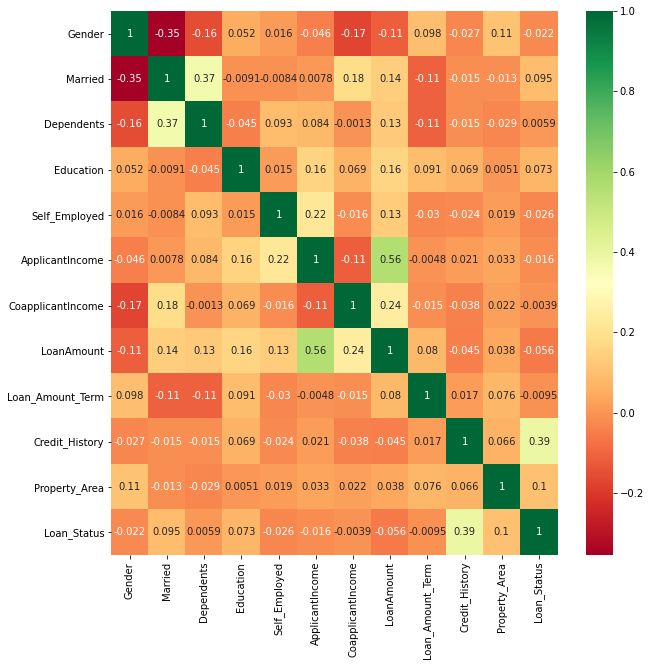

In [ ]:
#TEST 3 - Correlation matrix. Logistic Regression thrive on correlations
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Seems that the three feature selection models differ in what feature is the most important. As we will use a logistic regression model, we will keep: 
- Credit history (high in all three tests and the highest in the correlation)
- Applicant Income (high in two tests, negative in the correlation, a correlation with the loan amount)
- Property Area (Second highest in the correlation)
- Married (Third highest in correlation)
- Loan amount (As this is the height of the loan)


# Machine learning Model
As this is a binary problem (so yes or no in the status), I choose for binary models:
- Decision Tree
- K-nearest Neighbors
- Logistic regression model
For this example we will only use the Logistic Regression Model

For the record, I left out Random Forrest in this list, as this is a random decision tree model, so not the same outcome each time you run the model

In [ ]:
#Load the chosen model here
from sklearn.linear_model import LogisticRegression

# Split the dataset in train and test
Before we are going to use the models choosen, we will first split the dataset in a train and test set.
This because we want to test the performance of the model on the training set and to be able to check it's accuracy. 

In [ ]:
from sklearn.model_selection import train_test_split

#Let's split the set into the 5 most important features and the value to be predicted
X_5 = data[['Credit_History', 'ApplicantIncome', 'Married', 'Property_Area', 'LoanAmount']] #independent columns chosen 
y = data.iloc[:,-1]    #target column = Status of the loan

#I want to withhold 30 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X_5,y, test_size=0.3 , random_state = 25)

In [ ]:
print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of X_train is:  (398, 5)
Shape of X_test is:  (171, 5)
Shape of Y_train is:  (398,)
Shape of y_test is:  (171,)


In [ ]:
#Let's confirm that we use the same number of status approved versus disapproved in the test and train data.
#As approved is 1, this can be counted easily. 
print('The % approved status versus not approved in original_data :',data['Loan_Status'].value_counts().values/ len(data))
print('\nThe % approved status versus not approved in y_train :',y_train.value_counts().values/ len(y_train))
print('\nThe % approved status versus not approved in in y_test :',y_test.value_counts().values/ len(y_test))

The % approved status versus not approved in original_data : [0.69771529 0.30228471]

The % approved status versus not approved in y_train : [0.69095477 0.30904523]

The % approved status versus not approved in in y_test : [0.71345029 0.28654971]


This looks about the same, let's continue.

# Try and check the models 

In [ ]:
#To check the models, I want to build a check matrix within two functions:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('DETAILS ACCURACY, PRECISION AND RECALL')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

# Logistic regression

In [ ]:
# logistic_regression model
logistic_mod = LogisticRegression() 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Check the performance of the logistic regression model
probabilities = logistic_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.3) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive         2                47
Actual negative         3               119

DETAILS ACCURACY, PRECISION AND RECALL
Accuracy        0.71
AUC             0.63
Macro precision 0.56
Macro recall    0.51
 
           Positive      Negative
Num case       49           122
Precision    0.40          0.72
Recall       0.04          0.98
F1           0.07          0.83
